In [1]:
from urllib.request import urlretrieve

In [2]:
urlretrieve('https://hub.jovian.ml/wp-content/uploads/2020/09/italy-covid-daywise.csv','italy-covid-daywise.csv')

('italy-covid-daywise.csv', <http.client.HTTPMessage at 0x27b0c652430>)

In [3]:
import pandas as pd
df=pd.read_csv('italy-covid-daywise.csv')
df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        248 non-null    object 
 1   new_cases   248 non-null    float64
 2   new_deaths  248 non-null    float64
 3   new_tests   135 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe() #.describe() method is used to view statistical information of numrerical columns

,new_cases,new_deaths,new_tests
count,248.000000,248.000000,135.000000
mean,1094.818548,143.133065,31699.674074
std,1554.508002,227.105538,11622.209757
min,-148.000000,-31.000000,7841.000000
25%,123.000000,3.000000,25259.000000
50%,342.000000,17.000000,29545.000000
75%,1371.750000,175.250000,37711.000000
max,6557.000000,971.000000,95273.000000


In [6]:
df.iloc[:,-1::-1]

,new_tests,new_deaths,new_cases,date
0,NaN,0.0,0.0,2019-12-31
1,NaN,0.0,0.0,2020-01-01
2,NaN,0.0,0.0,2020-01-02
3,NaN,0.0,0.0,2020-01-03
4,NaN,0.0,0.0,2020-01-04
...,...,...,...,...
243,53541.0,1.0,1444.0,2020-08-30
244,42583.0,4.0,1365.0,2020-08-31
245,54395.0,6.0,996.0,2020-09-01
246,NaN,8.0,975.0,2020-09-02


In [7]:
df.sample(10) # .sample(n) method is used to get any random n elements

,date,new_cases,new_deaths,new_tests
20,2020-01-20,0.0,0.0,NaN
128,2020-05-07,1444.0,369.0,13665.0
200,2020-07-18,231.0,11.0,27569.0
109,2020-04-18,3493.0,575.0,NaN
201,2020-07-19,249.0,14.0,20621.0
79,2020-03-19,4207.0,473.0,NaN
24,2020-01-24,0.0,0.0,NaN
69,2020-03-09,1492.0,133.0,NaN
92,2020-04-01,4053.0,839.0,NaN
99,2020-04-08,3039.0,604.0,NaN


In [8]:
df[df.new_cases<0]

,date,new_cases,new_deaths,new_tests
172,2020-06-20,-148.0,47.0,29875.0


In [9]:
df.loc[172,'new_cases'] = df.loc[[171,173],'new_cases'].mean()

In [10]:
high_new_cases=df.new_cases > 1000
high_new_cases

0      False
1      False
2      False
3      False
4      False
       ...  
243     True
244     True
245    False
246    False
247     True
Name: new_cases, Length: 248, dtype: bool

In [11]:
df[high_new_cases]

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
...,...,...,...,...
241,2020-08-28,1409.0,5.0,65135.0
242,2020-08-29,1460.0,9.0,64294.0
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0


In [12]:
high_new_cases_df=df[df.new_cases > 1000]
high_new_cases_df

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
...,...,...,...,...
241,2020-08-28,1409.0,5.0,65135.0
242,2020-08-29,1460.0,9.0,64294.0
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0


In [13]:
# The dataframe contains many frames, but only the first 5 & last 5 were displayed for Jupitor
# To view all rows we can modify some display options
from IPython.display import display
with pd.option_context('display.max_rows',len(df[df.new_cases > 1000])):
    display(df[df.new_cases > 1000])

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
74,2020-03-14,2547.0,252.0,NaN
75,2020-03-15,3497.0,173.0,NaN
76,2020-03-16,2823.0,370.0,NaN
77,2020-03-17,4000.0,347.0,NaN
78,2020-03-18,3526.0,347.0,NaN


In [14]:
# performing operations on multiple columns leads to element wise operations btw columns
pos_rate = df.new_cases.sum()/df.new_tests.sum()
pos_rate

0.06355025031218921

In [15]:
df_high_pos_ratio=df[df.new_cases/df.new_tests > pos_rate]
df_high_pos_ratio

,date,new_cases,new_deaths,new_tests
111,2020-04-20,3047.0,433.0,7841.0
112,2020-04-21,2256.0,454.0,28095.0
114,2020-04-23,3370.0,437.0,37083.0
116,2020-04-25,3021.0,420.0,38676.0
117,2020-04-26,2357.0,415.0,24113.0
118,2020-04-27,2324.0,260.0,26678.0
124,2020-05-03,1900.0,474.0,27047.0
128,2020-05-07,1444.0,369.0,13665.0


In [16]:
# Adding new Positive_rate column 
df['positive_rate']=df.new_cases/df.new_tests
df

,date,new_cases,new_deaths,new_tests,positive_rate
0,2019-12-31,0.0,0.0,NaN,NaN
1,2020-01-01,0.0,0.0,NaN,NaN
2,2020-01-02,0.0,0.0,NaN,NaN
3,2020-01-03,0.0,0.0,NaN,NaN
4,2020-01-04,0.0,0.0,NaN,NaN
...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,0.026970
244,2020-08-31,1365.0,4.0,42583.0,0.032055
245,2020-09-01,996.0,6.0,54395.0,0.018311
246,2020-09-02,975.0,8.0,NaN,NaN


In [17]:
'''Sometimes it takes a few days to get the results for a test, so we can't 
really compare teh number of new cases to the nuber of new tests conducted'''

df.drop(columns=['positive_rate'],axis=1,inplace=True)
# with giving inplace = True the chages are updated to the same dataframe

In [18]:
df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


In [19]:
# Ascending Order (default ascending=True)
df.sort_values('new_cases',ascending=True )

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
28,2020-01-28,0.0,0.0,NaN
29,2020-01-29,0.0,0.0,NaN
30,2020-01-30,0.0,0.0,NaN
32,2020-02-01,0.0,0.0,NaN
...,...,...,...,...
88,2020-03-28,5959.0,971.0,NaN
89,2020-03-29,5974.0,887.0,NaN
81,2020-03-21,5986.0,625.0,NaN
87,2020-03-27,6153.0,660.0,NaN


In [20]:
with pd.option_context('display.max_rows',len(df.sort_values('new_cases'))):
    display(df.sort_values('new_cases'))

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
28,2020-01-28,0.0,0.0,NaN
29,2020-01-29,0.0,0.0,NaN
30,2020-01-30,0.0,0.0,NaN
32,2020-02-01,0.0,0.0,NaN
33,2020-02-02,0.0,0.0,NaN
35,2020-02-04,0.0,0.0,NaN
36,2020-02-05,0.0,0.0,NaN
37,2020-02-06,0.0,0.0,NaN
38,2020-02-07,0.0,0.0,NaN


In [21]:
# Descending Order
df.sort_values('new_cases',ascending=False).tail(10)

,date,new_cases,new_deaths,new_tests
23,2020-01-23,0.0,0.0,NaN
24,2020-01-24,0.0,0.0,NaN
25,2020-01-25,0.0,0.0,NaN
26,2020-01-26,0.0,0.0,NaN
27,2020-01-27,0.0,0.0,NaN
28,2020-01-28,0.0,0.0,NaN
29,2020-01-29,0.0,0.0,NaN
32,2020-02-01,0.0,0.0,NaN
33,2020-02-02,0.0,0.0,NaN
0,2019-12-31,0.0,0.0,NaN


In [22]:
df['date']=pd.to_datetime(df.date)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        248 non-null    datetime64[ns]
 1   new_cases   248 non-null    float64       
 2   new_deaths  248 non-null    float64       
 3   new_tests   135 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 7.9 KB


In [24]:
df['year'] = pd.DatetimeIndex(df.date).year
df['month'] = pd.DatetimeIndex(df.date).month
df['day'] = pd.DatetimeIndex(df.date).day
df['weekday'] = pd.DatetimeIndex(df.date).weekday

In [25]:
df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5
...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2


In [26]:
df_may=df[df.month==5]
df_may.shape, df_may.head(10)

((31, 8),
           date  new_cases  new_deaths  new_tests  year  month  day  weekday
 122 2020-05-01     1872.0       285.0    43732.0  2020      5    1        4
 123 2020-05-02     1965.0       269.0    31231.0  2020      5    2        5
 124 2020-05-03     1900.0       474.0    27047.0  2020      5    3        6
 125 2020-05-04     1389.0       174.0    22999.0  2020      5    4        0
 126 2020-05-05     1221.0       195.0    32211.0  2020      5    5        1
 127 2020-05-06     1075.0       236.0    37771.0  2020      5    6        2
 128 2020-05-07     1444.0       369.0    13665.0  2020      5    7        3
 129 2020-05-08     1401.0       274.0    45428.0  2020      5    8        4
 130 2020-05-09     1327.0       243.0    36091.0  2020      5    9        5
 131 2020-05-10     1083.0       194.0    31384.0  2020      5   10        6)

In [27]:
df_may_metrics=df_may.iloc[:,[1,2,3]]
df_may_metrics

,new_cases,new_deaths,new_tests
122,1872.0,285.0,43732.0
123,1965.0,269.0,31231.0
124,1900.0,474.0,27047.0
125,1389.0,174.0,22999.0
126,1221.0,195.0,32211.0
127,1075.0,236.0,37771.0
128,1444.0,369.0,13665.0
129,1401.0,274.0,45428.0
130,1327.0,243.0,36091.0
131,1083.0,194.0,31384.0


In [28]:
covid_may_totals=df_may_metrics.sum()
covid_may_totals

new_cases       29073.0
new_deaths       5658.0
new_tests     1078720.0
dtype: float64

In [29]:
type(covid_may_totals)

pandas.core.series.Series

In [30]:
# Above operations can be done in a single statement
df[df.month==5].iloc[:,[1,2,3]].sum()

new_cases       29073.0
new_deaths       5658.0
new_tests     1078720.0
dtype: float64

In [31]:
# Averages of  New-Cases, New-Deaths, New-Tests on weekends
covid_weekend_metrics = df[df.weekday>=5].iloc[:,[1,2,3]].mean()
covid_weekend_metrics

new_cases      1222.892857
new_deaths      158.228571
new_tests     31588.789474
dtype: float64

In [32]:
df[df.weekday>=5].iloc[:,[1,2,3,5,6,7]].sort_values(['month','weekday']).head(30)

,new_cases,new_deaths,new_tests,month,day,weekday
4,0.0,0.0,NaN,1,4,5
11,0.0,0.0,NaN,1,11,5
18,0.0,0.0,NaN,1,18,5
25,0.0,0.0,NaN,1,25,5
5,0.0,0.0,NaN,1,5,6
12,0.0,0.0,NaN,1,12,6
19,0.0,0.0,NaN,1,19,6
26,0.0,0.0,NaN,1,26,6
32,0.0,0.0,NaN,2,1,5
39,0.0,0.0,NaN,2,8,5


In [33]:
df_covid_weekend = df[df.weekday>=5].iloc[:,[1,2,3,5,6,7]].sort_values(['month','weekday'])

In [34]:
#import jovian
#jovian.commit()

In [62]:
covid_month_df = df.groupby('month')[['new_cases','new_deaths', 'new_tests']].sum()
covid_month_df

,new_cases,new_deaths,new_tests
month,,,
1,3.0,0.0,0.0
2,885.0,21.0,0.0
3,100851.0,11570.0,0.0
4,101852.0,16091.0,419591.0
5,29073.0,5658.0,1078720.0
6,8217.5,1404.0,830354.0
7,6722.0,388.0,797692.0
8,21060.0,345.0,1098704.0
9,3297.0,20.0,54395.0


In [36]:
df['total_cases']=df.new_cases.cumsum()
df['total_deaths']=df.new_deaths.cumsum()
df['total_tests']=df.new_tests.cumsum()
df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,267298.5,35473.0,4182478.0
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268663.5,35477.0,4225061.0
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269659.5,35483.0,4279456.0
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270634.5,35491.0,NaN


In [37]:
urlretrieve('https://hub.jovian.ml/wp-content/uploads/2020/09/locations.csv','locations.csv')

('locations.csv', <http.client.HTTPMessage at 0x27b0ee97a90>)

In [38]:
loc_df=pd.read_csv("locations.csv")
loc_df

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,Afghanistan,Asia,3.892834e+07,64.83,0.500,1803.987
1,Albania,Europe,2.877800e+06,78.57,2.890,11803.431
2,Algeria,Africa,4.385104e+07,76.88,1.900,13913.839
3,Andorra,Europe,7.726500e+04,83.73,NaN,NaN
4,Angola,Africa,3.286627e+07,61.15,NaN,5819.495
...,...,...,...,...,...,...
207,Yemen,Asia,2.982597e+07,66.12,0.700,1479.147
208,Zambia,Africa,1.838396e+07,63.89,2.000,3689.251
209,Zimbabwe,Africa,1.486293e+07,61.49,1.700,1899.775
210,World,NaN,7.794799e+09,72.58,2.705,15469.207


In [39]:
loc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   location                    212 non-null    object 
 1   continent                   210 non-null    object 
 2   population                  211 non-null    float64
 3   life_expectancy             208 non-null    float64
 4   hospital_beds_per_thousand  165 non-null    float64
 5   gdp_per_capita              184 non-null    float64
dtypes: float64(4), object(2)
memory usage: 10.1+ KB


In [40]:
loc_df.isnull().sum()

location                       0
continent                      2
population                     1
life_expectancy                4
hospital_beds_per_thousand    47
gdp_per_capita                28
dtype: int64

In [41]:
loc_df[loc_df.location=='Italy']

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
97,Italy,Europe,60461828.0,83.51,3.18,35220.084


In [42]:
df['location']='Italy'
df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests,location
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,0.0,NaN,Italy
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,0.0,NaN,Italy
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,0.0,NaN,Italy
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,0.0,NaN,Italy
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,0.0,NaN,Italy
...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,267298.5,35473.0,4182478.0,Italy
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268663.5,35477.0,4225061.0,Italy
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269659.5,35483.0,4279456.0,Italy
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270634.5,35491.0,NaN,Italy


In [43]:
italy_df=df.merge(loc_df,on='location')
italy_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,267298.5,35473.0,4182478.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268663.5,35477.0,4225061.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269659.5,35483.0,4279456.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270634.5,35491.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084


In [44]:
italy_df['cases_per_Mill']=italy_df.total_cases * 1e6/italy_df.population
italy_df['deaths_per_Mill']=italy_df.total_deaths * 1e6/italy_df.population
italy_df['tests_per_Mill']=italy_df.total_tests * 1e6/italy_df.population

In [45]:
italy_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita,cases_per_Mill,deaths_per_Mill,tests_per_Mill
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,267298.5,35473.0,4182478.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4420.946386,586.700753,69175.513516
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268663.5,35477.0,4225061.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4443.522614,586.766910,69879.809125
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269659.5,35483.0,4279456.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4459.995818,586.866146,70779.467667
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270634.5,35491.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,4476.121695,586.998461,NaN


In [50]:
italy_df.columns

Index(['date', 'new_cases', 'new_deaths', 'new_tests', 'year', 'month', 'day',
       'weekday', 'total_cases', 'total_deaths', 'total_tests', 'location',
       'continent', 'population', 'life_expectancy',
       'hospital_beds_per_thousand', 'gdp_per_capita', 'cases_per_Mill',
       'deaths_per_Mill', 'tests_per_Mill'],
      dtype='object')

In [51]:
result_df=italy_df[['date', 'new_cases', 'new_deaths', 'new_tests', 'total_cases', 'total_deaths', 'total_tests', 'location',
       'continent', 'population', 'life_expectancy','hospital_beds_per_thousand', 'gdp_per_capita', 'cases_per_Mill',
       'deaths_per_Mill', 'tests_per_Mill']]

In [52]:
result_df.to_csv('results.csv',index=None)

<AxesSubplot:>

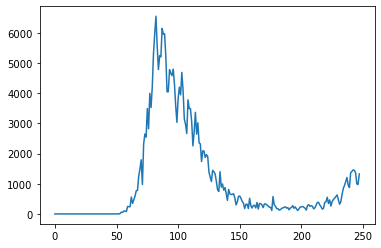

In [54]:
result_df.new_cases.plot()

In [55]:
result_df.set_index('date',inplace=True)

<AxesSubplot:xlabel='date'>

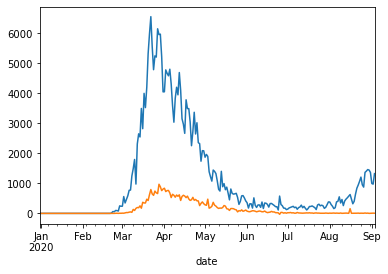

In [59]:
result_df.new_cases.plot()
result_df.new_deaths.plot()

In [63]:
covid_month_df

,new_cases,new_deaths,new_tests
month,,,
1,3.0,0.0,0.0
2,885.0,21.0,0.0
3,100851.0,11570.0,0.0
4,101852.0,16091.0,419591.0
5,29073.0,5658.0,1078720.0
6,8217.5,1404.0,830354.0
7,6722.0,388.0,797692.0
8,21060.0,345.0,1098704.0
9,3297.0,20.0,54395.0


<AxesSubplot:xlabel='month'>

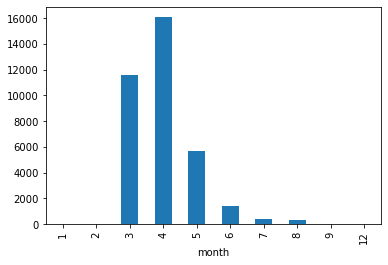

In [83]:
covid_month_df.new_deaths.plot(kind='bar')

<AxesSubplot:xlabel='month'>

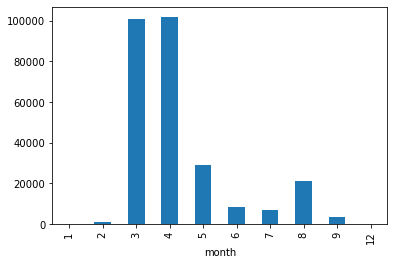

In [84]:
covid_month_df.new_cases.plot(kind='bar')